## CORRECTOR-TO-BPM RESPONSE MATRIX

The modelling of the linear optics uses the orbit response matrix (ORM) of N BPMs and M correctors defined as
$$ C_{ij}=\frac{\Delta x_i}{\Delta \theta_j} $$
where $\Delta x_i$ is the orbit change at the beam position monitor (BPM) i and $\Delta \theta_j$ is the kick of a corrector magnet  j. 

An accelerator with m-BPMS and n-correctors produces an m x n dimensional response
matrix.

$$C_{mn}=\frac{\sqrt{\beta_m\beta_n}}{2\sin(\pi \nu)}\cos(\pi\nu -\phi(s)+\phi(s_0))$$

The elements of c may be obtained from the machine model or be determined
experimentally by measuring the deviation at each BPM resulting from exciting
each corrector individually.

The task of the orbit correction is to find a set of corrector kicks $\theta$. that satisfy the
following relation:
$\Delta x + C\Delta\theta =0$


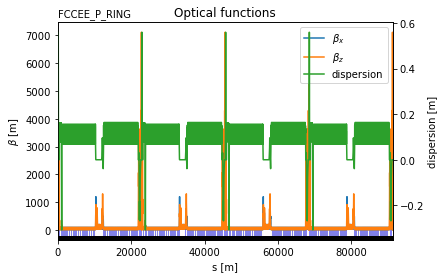

(<AxesSubplot:title={'left':'FCCEE_P_RING','center':'Optical functions'}, xlabel='s [m]', ylabel='$\\beta$ [m]'>,
 <AxesSubplot:ylabel='dispersion [m]'>,
 <AxesSubplot:>)

In [3]:
import at
from at.plot import plot_beta
import time
import matplotlib.pyplot as plt
#import modules
from at_modules_orbit_corrections import *


ring = at.load_mat('fccee_t_v22_b_c.mat', key='ring')
ring.radiation_off()


#from modules import show_lindata
#show_lindata(lat=r, refpts=range(len(r)))

ring.plot_beta()

#plt.show()

In [4]:
from at import get_refpts
element_indexes = get_refpts(ring, "*")
quad_indexes = get_refpts(ring,at.elements.Quadrupole)
sext_indexes = get_refpts(ring,at.elements.Sextupole)
bend_indexes = get_refpts(ring, at.elements.Dipole)
marker_indexes = get_refpts(ring, at.elements.Marker)
BPM_indexes = get_refpts(ring, at.elements.Monitor)
drift_indexes = get_refpts(ring , at.elements.Drift)
corrector_indexes = get_refpts(ring , at.elements.Corrector)

In [5]:
BPM_indexes

array([    4,     8,    12, ..., 24441, 24445, 24449], dtype=uint32)

In [6]:

corrector_indexes

array([    5,     9,    13, ..., 24442, 24446, 24450], dtype=uint32)

In [7]:
for i in sext_indexes:
    ring[i].H=ring[i].H*0

In [8]:
print("Response_matrix_x")
t0 = time.time()
Rx = ResponseMatrix_x(dkick=1.e-6,ring=ring)
t1 = time.time()
print(f"Execution time: {t1 - t0} sec")

print("Response_matrix_y")
t0 = time.time()
Ry = ResponseMatrix_y(dkick=1.e-6,ring=ring)
t1 = time.time()
print(f"Execution time: {t1 - t0} sec")

Response_matrix_x
Execution time: 4770.591580152512 sec
Response_matrix_y
Execution time: 4700.819697856903 sec


preparing twiss ..
Tunes=[0.22406236 0.35994024]
Chrom=[ -551.70126195 -2083.27363393]


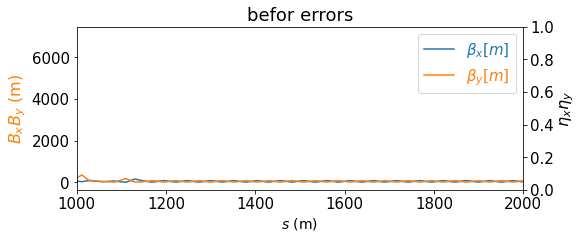

In [9]:
elements_indexes = get_refpts(ring,'*')
twiss = getOptics(ring, elements_indexes)
make_plot(twiss, 'befor errors')

Closed orbit before errors


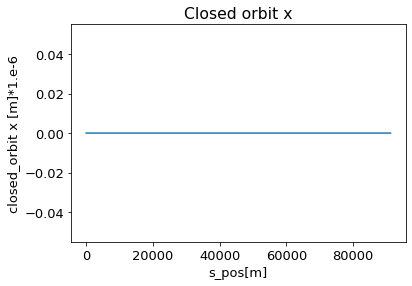

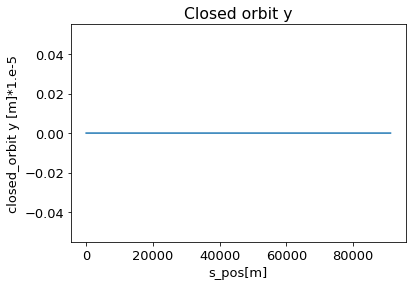

In [10]:
print("Closed orbit before errors")
plot_closedOrbit_all(ring, '*')
#plot_closedOrbit(ring, '*')

SVD


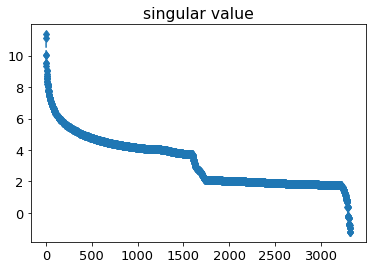

In [11]:
import numpy.linalg
numpy.linalg.cond(Rx)

print("SVD")
# SVD
u, s, vh = np.linalg.svd(Rx, full_matrices=False)
u_1 = np.transpose(u)
s_1 = np.transpose(s)
vh_1 = np.transpose(vh)
#plt.plot(s)
plt.plot(np.log(s), 'd--')
plt.title('singular value')
plt.show()

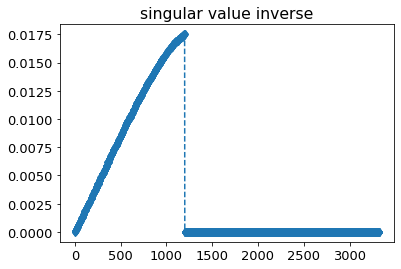

In [12]:
# Cut_off
b=1./s
#n_svd =245
n_svd =1200
b[n_svd:] = 0
sig =  np.diag(b)
Rvx = np.transpose(vh) @ sig @ np.transpose(u)

plt.plot(b, 'd--')
plt.title('singular value inverse')
plt.show()

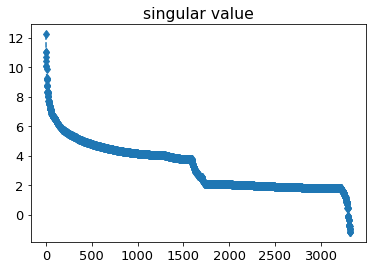

In [13]:
# SVD
u, s, vh = np.linalg.svd(Ry, full_matrices=False)
u_1 = np.transpose(u)
s_1 = np.transpose(s)
vh_1 = np.transpose(vh)
#plt.plot(s)
plt.plot(np.log(s), 'd--')
plt.title('singular value')
plt.show()


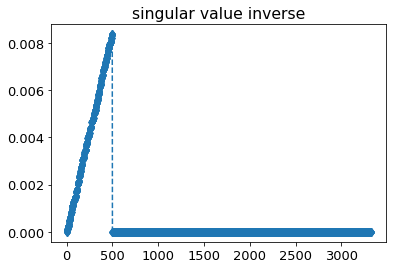

In [14]:
# Cut_off
b=1./s
#n_svd =245
n_svd =500
b[n_svd:] = 0
sig =  np.diag(b)
Rvy = np.transpose(vh) @ sig @ np.transpose(u)

plt.plot(b, 'd--')
plt.title('singular value inverse')
plt.show()

simulate errors
simulate errors
simulating perturbed machine...
Done...
Closed orbit after errors


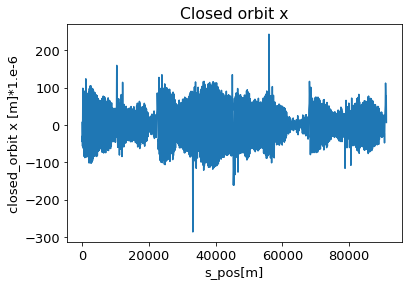

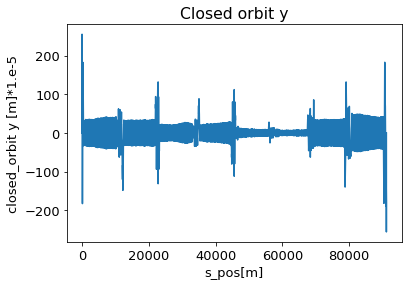

preparing twiss ..
Tunes=[0.22406236 0.35994025]
Chrom=[ -551.70125845 -2083.27063953]


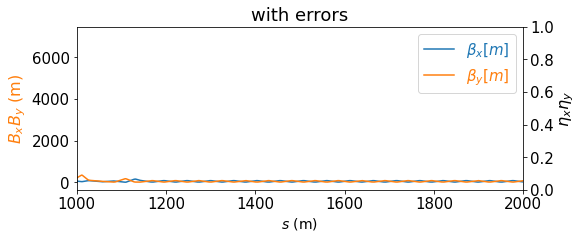

In [15]:
print("simulate errors")

print("simulate errors")

#Qs_strength
## simulate_errors


errorQ = 0
tiltQ =0
shiftQx =1.e-6
shiftQy = 1.e-6

quads_info_error = simulateError(ring, errorQ, tiltQ, shiftQx,shiftQy, debug=False)
print("Closed orbit after errors")
plot_closedOrbit_all(ring, '*')

# closed orbit after error
elements_indexes = get_refpts(ring,'*')
twiss_error = getOptics(ring, elements_indexes)
make_plot(twiss_error, 'with errors')



Closed orbit after correction


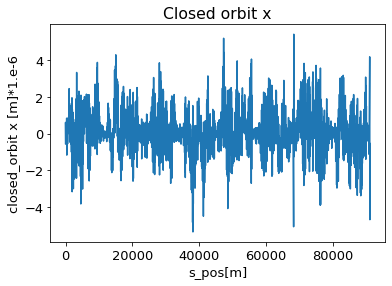

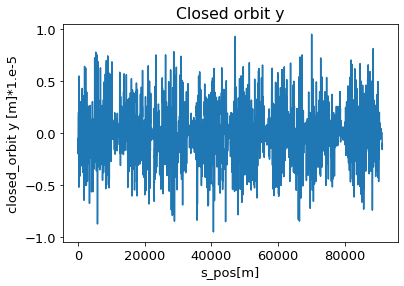

preparing twiss ..
Tunes=[0.22406236 0.35994024]
Chrom=[ -551.70126188 -2083.27363874]


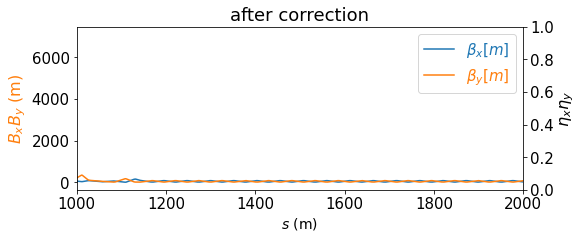

In [16]:
#Corrector_strength

bpm_indexes = get_refpts(ring, elements.Monitor)
lindata0, tune, chrom, lindata = ring.linopt(get_chrom=True, refpts=bpm_indexes)
closed_orbitx = lindata['closed_orbit'][:, 0]
closed_orbity = lindata['closed_orbit'][:, 2]


CSx = np.dot(np.transpose(Rvx),-closed_orbitx)
CSy = np.dot(np.transpose(Rvy),-closed_orbity)


correctors_indexes = get_refpts(ring, elements.Corrector)
for m in range(len(correctors_indexes)):
    ring[correctors_indexes[m]].KickAngle  = [0,0]
    ring[correctors_indexes[m]].KickAngle  = [CSx[m],CSy[m]]


# Result
print("Closed orbit after correction")
plot_closedOrbit_all(ring, '*')


elements_indexes = get_refpts(ring,'*')
twiss_correctes = getOptics(ring, elements_indexes)
make_plot(twiss_correctes, 'after correction')

In [17]:
sext_indexes

array([   54,    55,    77, ..., 24378, 24400, 24401], dtype=uint32)

In [18]:
ring[55]

Sextupole('sy1r.2', 0.15, -0.0, NumIntSteps=40)